# Gradient Descent
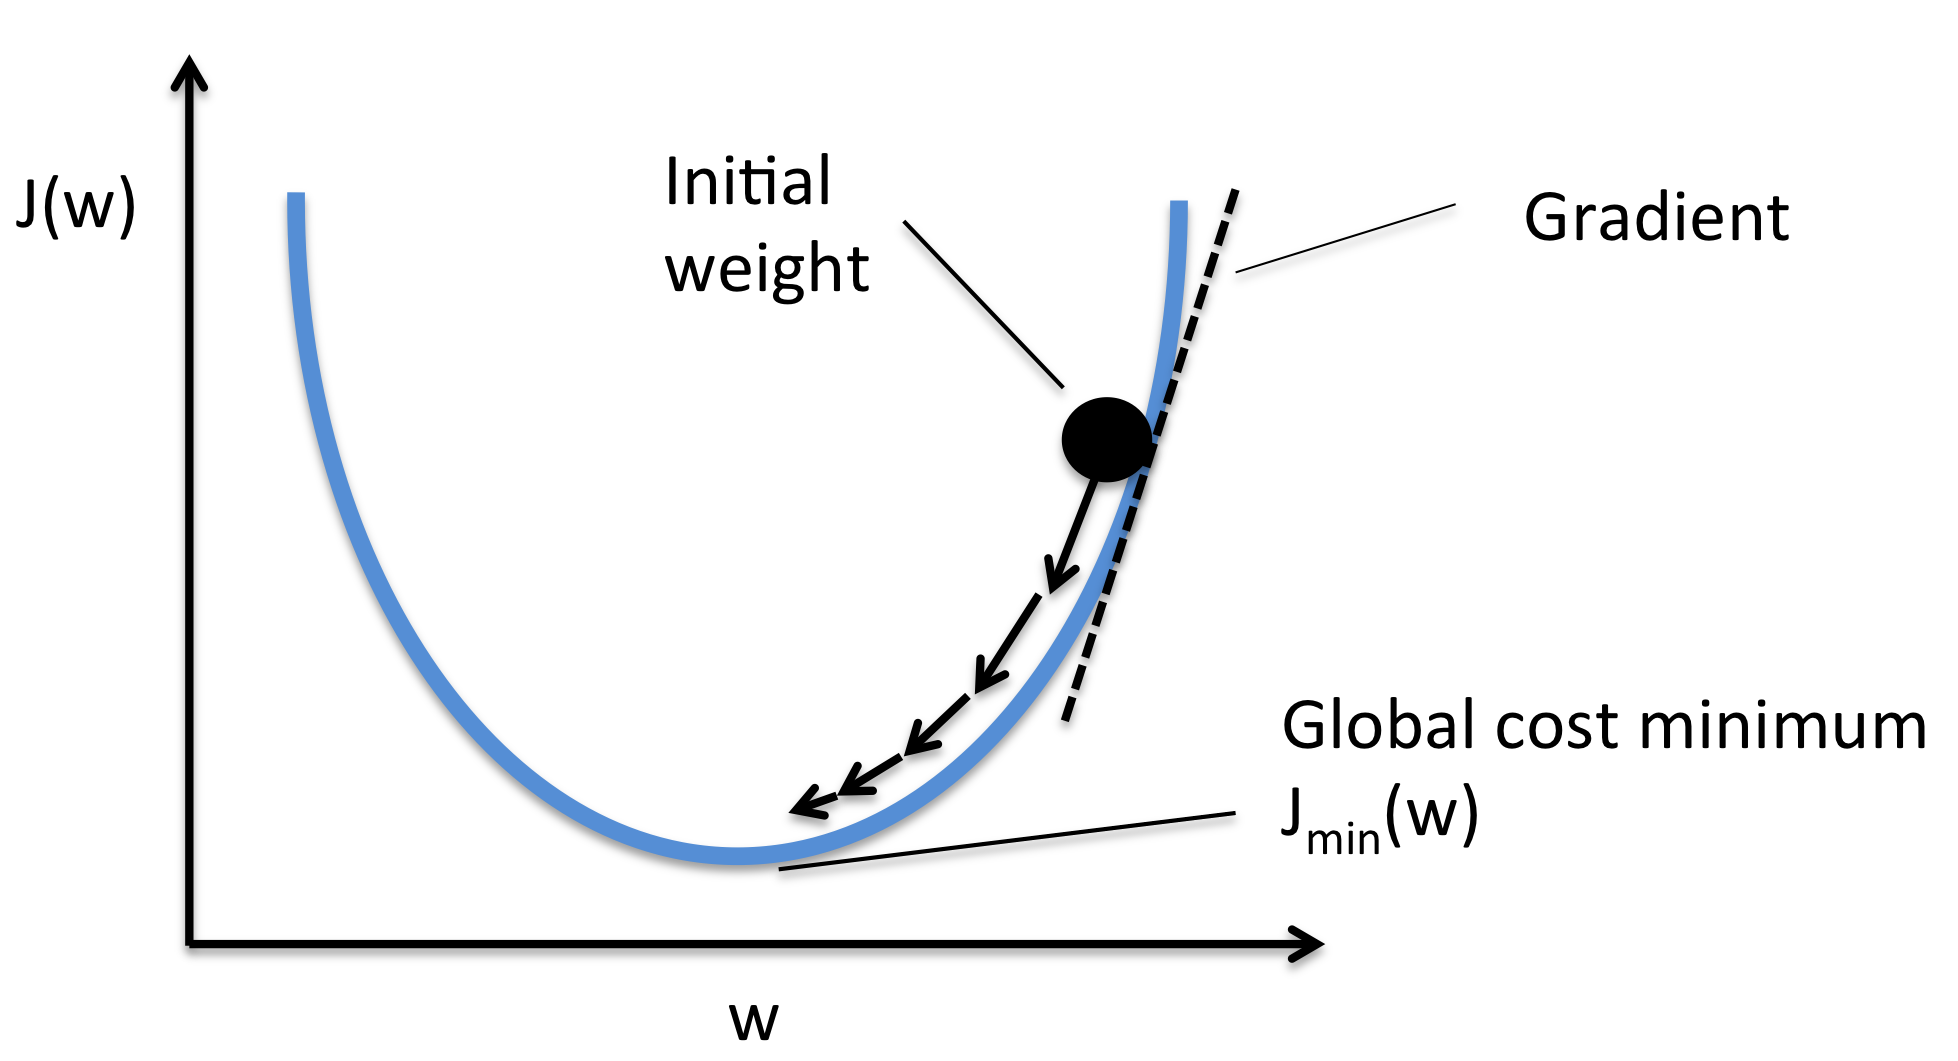

Gradient descent is an optimization algorithm used in machine learning to find the minimum of a function. The goal is to iteratively adjust the values of the function's parameters in the direction of the negative gradient to reach the global minimum.

The algorithm starts with an initial set of parameter values and computes the gradient of the objective function with respect to these parameters. This process is repeated iteratively until the objective function converges to a minimum, or when reaching a maximum number of iterations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from mpl_toolkits import mplot3d
random.seed(8)

We generate a cubic function for visualization of how a gradient descent works.

<Axes: >

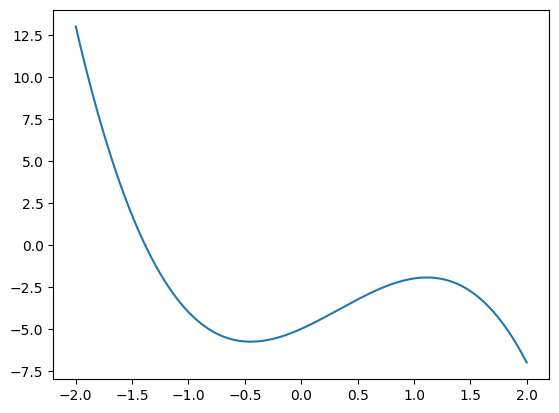

In [2]:
def f(x):
    y = -2*x**3+2*x**2+3*x-5
    return y

x = np.linspace(-2,2,1000)
y = f(x)
sns.lineplot(x=x, y=y)

We choose a random starting point, e.g. x = -1.8 and visualize its gradient.

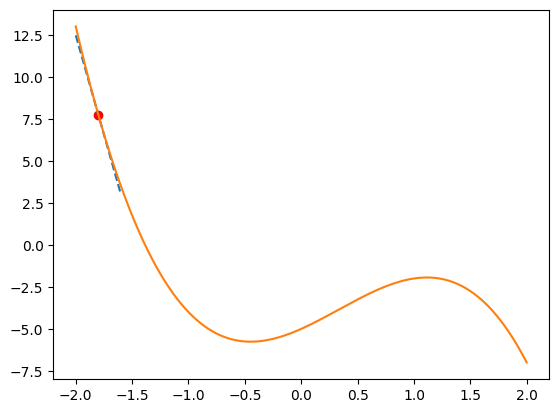

In [3]:
def df(x):
    dy = -6*x**2+4*x+3
    return dy

# Choose a point
x_o = -1.8

line_x = np.linspace(x_o - 0.2, x_o + 0.2,1000)
# y = m*(x - x1) + y1
line_y = df(x_o)*(line_x - x_o) + f(x_o)
sns.lineplot(x=line_x, y=line_y, linestyle='--')
sns.lineplot(x=x, y=y)
plt.scatter(x_o, f(x_o), color = 'red')

Now we take one step forward with a learning rate of 0.1, and visualize how taking one step back changes our initial point position

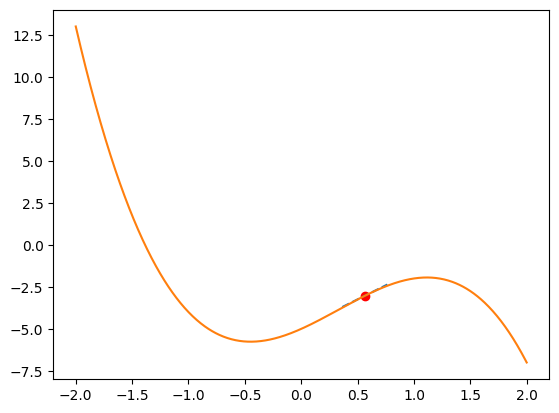

In [4]:
learning_rate = 0.1
x_o = -1.8
x_1 = x_o - learning_rate*df(x_o)
line_x = np.linspace(x_1 - 0.2, x_1 + 0.2,1000)
line_y = df(x_1)*(line_x - x_1) + f(x_1)
sns.lineplot(x=line_x, y=line_y, linestyle='--')
sns.lineplot(x=x, y=y)
plt.scatter(x_1, f(x_1), color = 'red')

We can see how our point descends towards a lower point and almost reaches the bottom. By visualizing the entire process of descending from the initial point to reaching a global minimum, we can better understand how the optimization algorithm works.

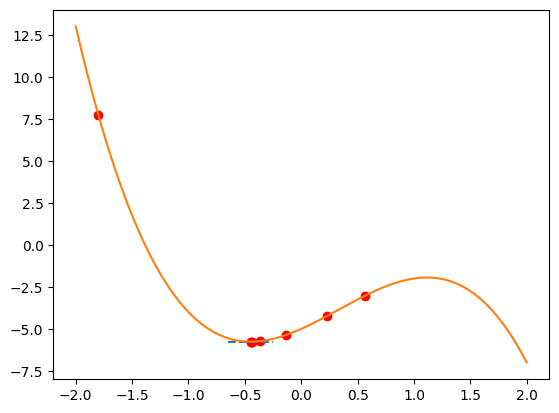

In [5]:
def derivative_descent(learning_rate, x_o, epoch = 100):
    X = [x_o]
    Y = [f(x_o)]
    i = 0
    while abs(df(X[-1])) > 0.001 and i < epoch:
        x_1 = X[-1] - learning_rate*df(X[-1])
        X.append(x_1)
        Y.append(f(x_1))
        i = i + 1
    line_x = np.linspace(X[-1] - 0.2, X[-1] + 0.2,1000)
    line_y = df(X[-1])*(line_x - x_1) + f(X[-1])
    return line_x, line_y, X, Y

line_x, line_y, X, Y = derivative_descent(0.1, -1.8)
sns.lineplot(x=line_x, y=line_y, linestyle='--')
sns.lineplot(x=x, y=y)
plt.scatter(X, Y, color = 'red')

We can also visualize how tweaking the learning rates impact the gradient descent process. If the learning rate is too small, the algorithm will take small steps and may require many iterations to converge to a minimum. Conversely, if the learning rate is too large, the algorithm will take large steps and may overshoot the minimum, leading to divergence. 

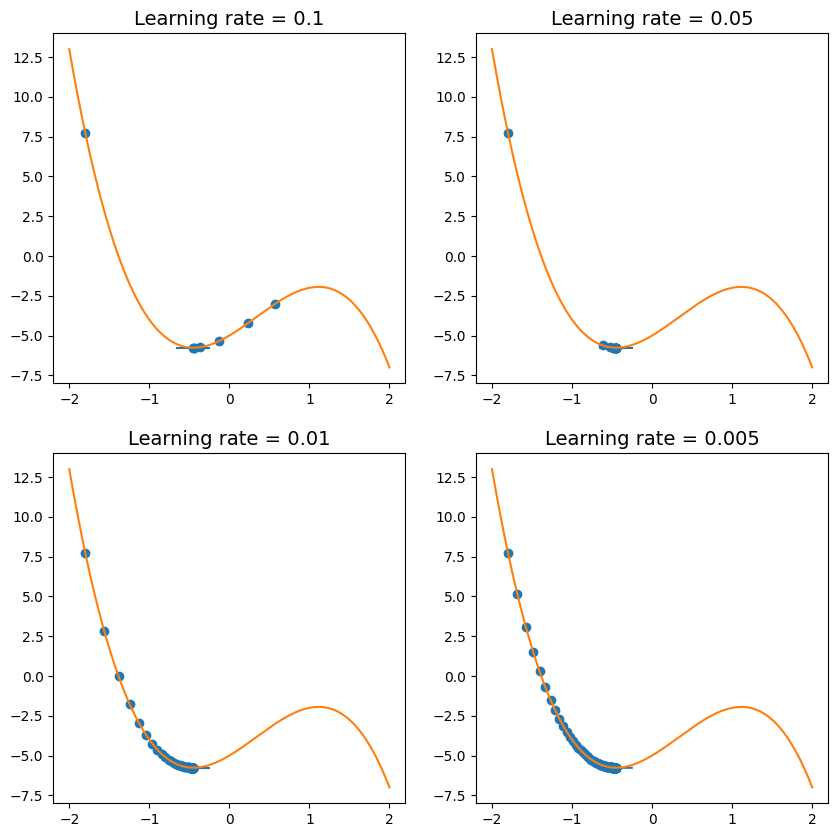

In [6]:
learning_rates = [0.1, 0.05, 0.01, 0.005]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for ax, lr in zip(axs.flat, learning_rates):
    line_x, line_y, X, Y = derivative_descent(lr, -1.8)
    ax.plot(line_x, line_y)
    ax.plot(x, y)
    ax.scatter(X, Y)
    ax.set_title("Learning rate = " + str(lr), fontsize = 14)

We can gain further insight into the optimization process by visualizing the gradient descent in a 3D model. This can help us better understand how the algorithm moves towards the minimum and the path it takes to get there.



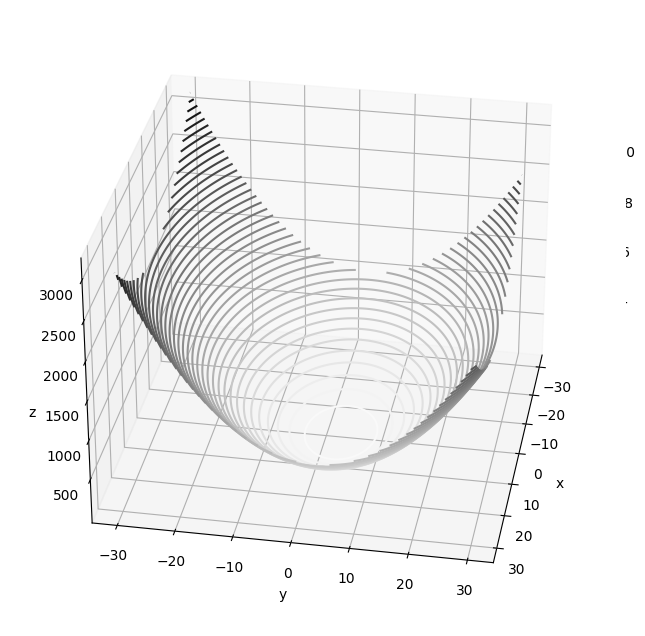

In [7]:
def F(x, y):
    return (x - 2)**2 + 2*(y - 3)**2
x = np.linspace(-30, 30, 300)
y = np.linspace(-30, 30, 300)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(30, 10)
plt.show()

We implement the partial derivative function for our 3D model and use it to visualize how a randomly chosen starting point descends towards a global minimum.

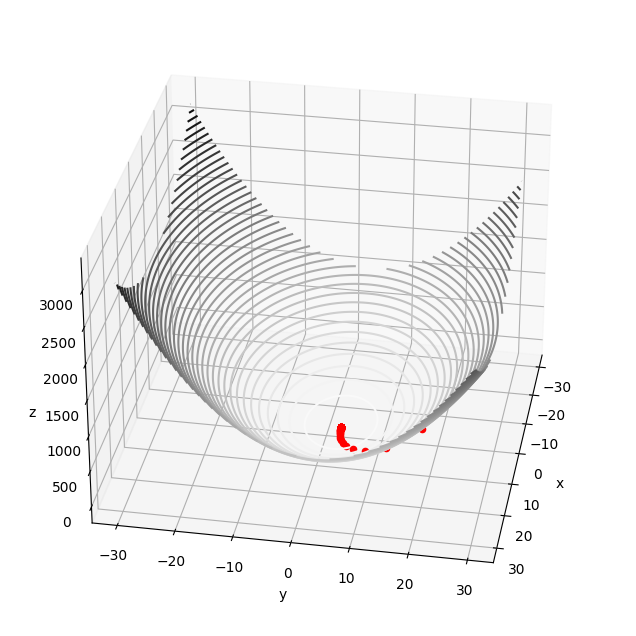

In [8]:
def dF(x, y):
    return np.array([2*x-4, 4*y-12])

def derivative_Descent(learning_rate, x, y, epoch = 100):
    X_new = [x]
    Y_new = [y]
    i = 0
    while i < epoch:
        dFx, dFy = dF(x, y)
        x = x - learning_rate*dFx
        y = y - learning_rate*dFy
        X_new.append(x)
        Y_new.append(y)
        i = i + 1
    return [X_new, Y_new]

learning_rate = 0.1
X_new, Y_new = derivative_Descent(learning_rate, 20, 20, epoch = 100)

x = np.linspace(-30, 30, 300)
y = np.linspace(-30, 30, 300)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(X_new)):
    ax.scatter3D([X_new[i]], 
                 [Y_new[i]], 
                 [F(X_new[i], Y_new[i])], color = "red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 10)
plt.show()

# Conclusion
Gradient descent is a very powerful for optimizing machine model. Therefore, finding the right learning rate is critical for the success of the gradient descent algorithm. 